In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [62]:
df = pd.read_csv('vgsales - httpswww.kaggle.comdatasetsgregorutvideogamesalesresource=download.csv')

Preprocessing

In [63]:
# Checking for missing values
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [64]:
# Handling Missing Values
df['Year'] = df['Year'].fillna(df['Year'].median())

In [65]:
df = df.dropna(subset=['Publisher'])

In [66]:
print(df.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [48]:
#Convert Year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

Exploratoy Data Analysis (EDA)

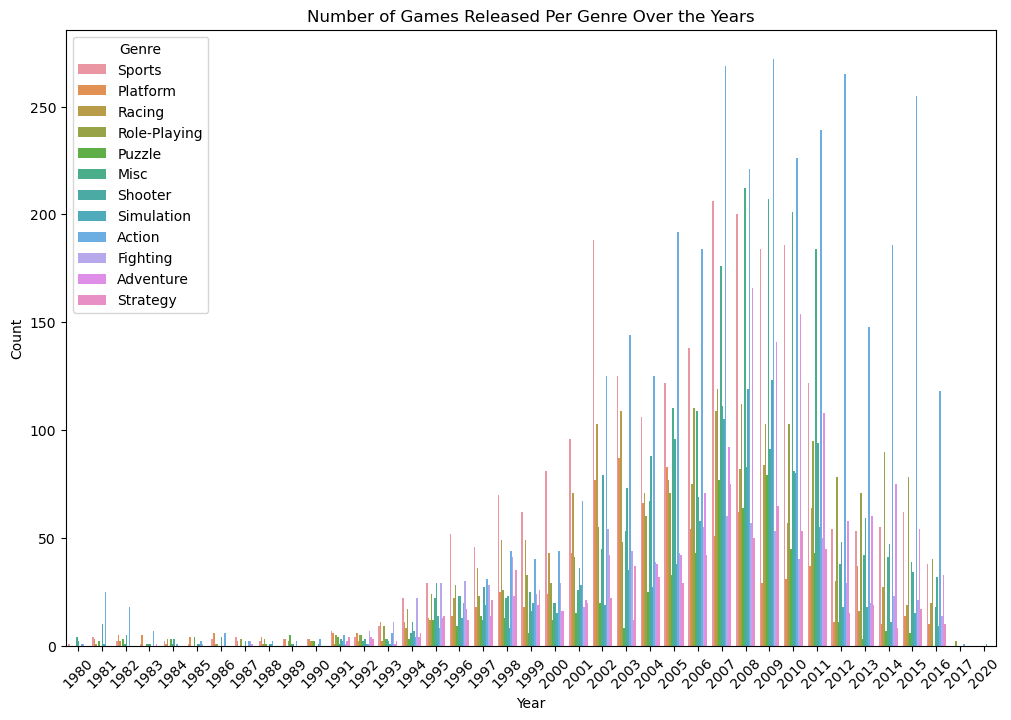

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x=df['Year'].dt.year, hue='Genre')
plt.title('Number of Games Released Per Genre Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.show()

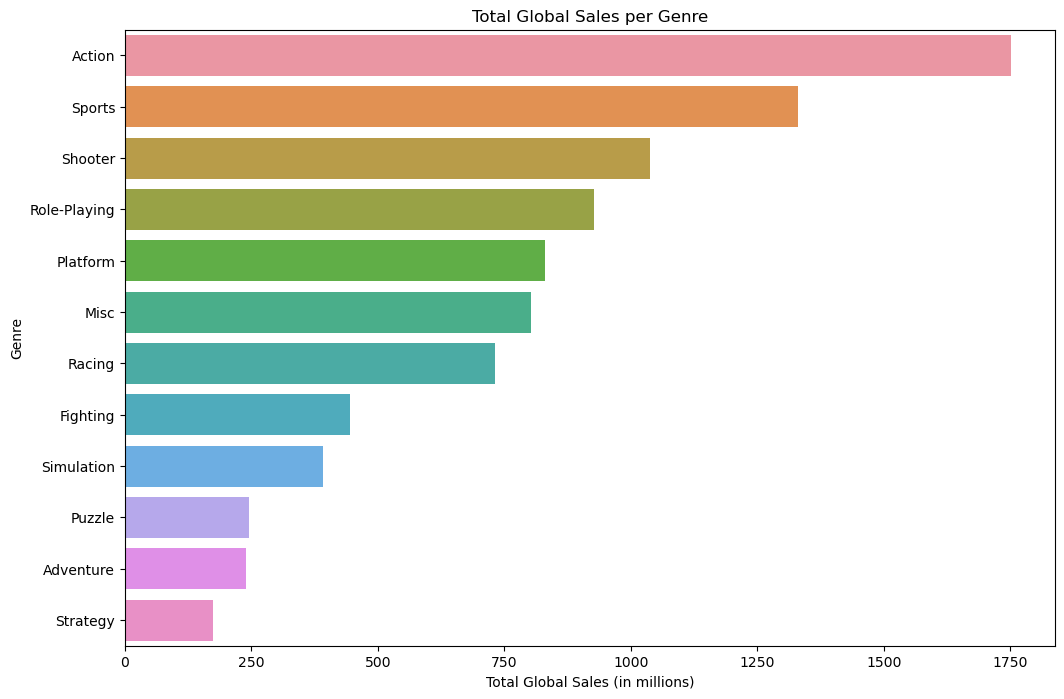

In [9]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title('Total Global Sales per Genre')
plt.xlabel('Total Global Sales (in millions)')
plt.ylabel('Genre')
plt.show()

In [49]:
genre_sales_na = df.groupby('Genre')['NA_Sales'].sum().reset_index()
genre_sales_eu = df.groupby('Genre')['EU_Sales'].sum().reset_index()
genre_sales_jp = df.groupby('Genre')['JP_Sales'].sum().reset_index()
genre_sales_other = df.groupby('Genre')['Other_Sales'].sum().reset_index()

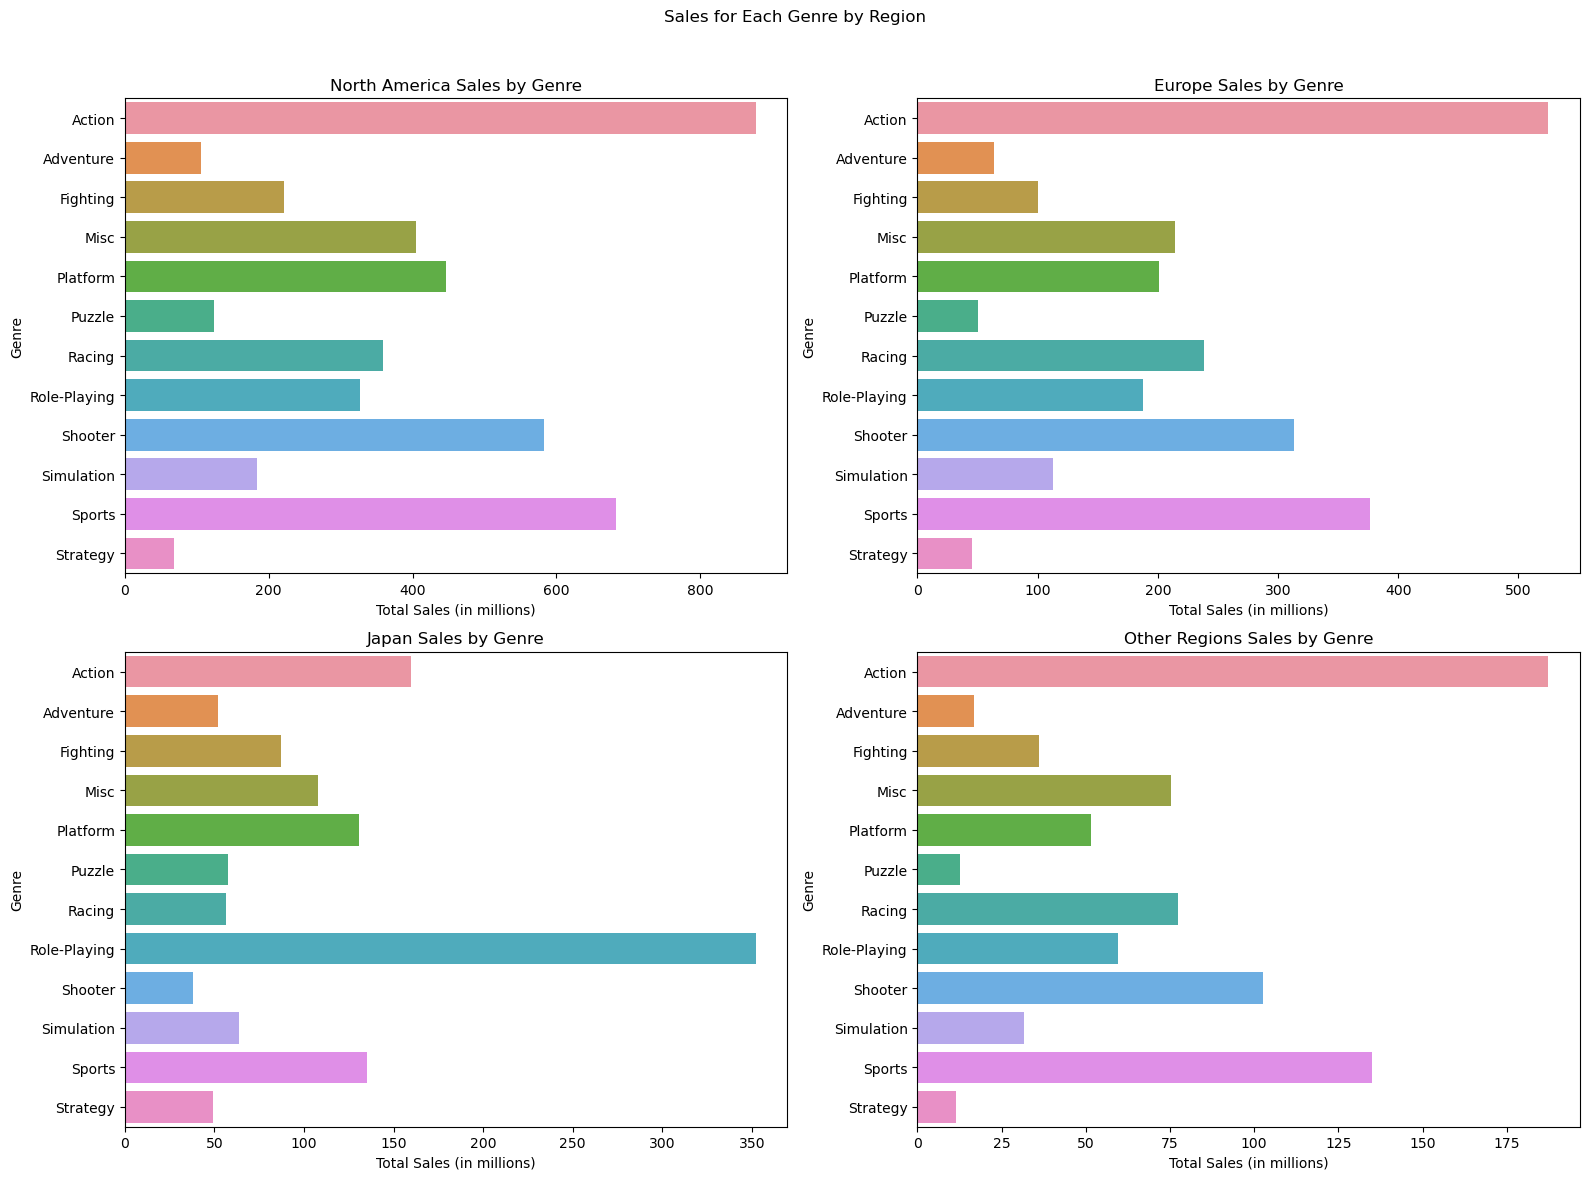

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Sales for Each Genre by Region')

# Plot for North America
sns.barplot(x='NA_Sales', y='Genre', data=genre_sales_na, ax=axes[0, 0])
axes[0, 0].set_title('North America Sales by Genre')
axes[0, 0].set_xlabel('Total Sales (in millions)')
axes[0, 0].set_ylabel('Genre')

# Plot for Europe
sns.barplot(x='EU_Sales', y='Genre', data=genre_sales_eu, ax=axes[0, 1])
axes[0, 1].set_title('Europe Sales by Genre')
axes[0, 1].set_xlabel('Total Sales (in millions)')
axes[0, 1].set_ylabel('Genre')

# Plot for Japan
sns.barplot(x='JP_Sales', y='Genre', data=genre_sales_jp, ax=axes[1, 0])
axes[1, 0].set_title('Japan Sales by Genre')
axes[1, 0].set_xlabel('Total Sales (in millions)')
axes[1, 0].set_ylabel('Genre')

# Plot for Other regions
sns.barplot(x='Other_Sales', y='Genre', data=genre_sales_other, ax=axes[1, 1])
axes[1, 1].set_title('Other Regions Sales by Genre')
axes[1, 1].set_xlabel('Total Sales (in millions)')
axes[1, 1].set_ylabel('Genre')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


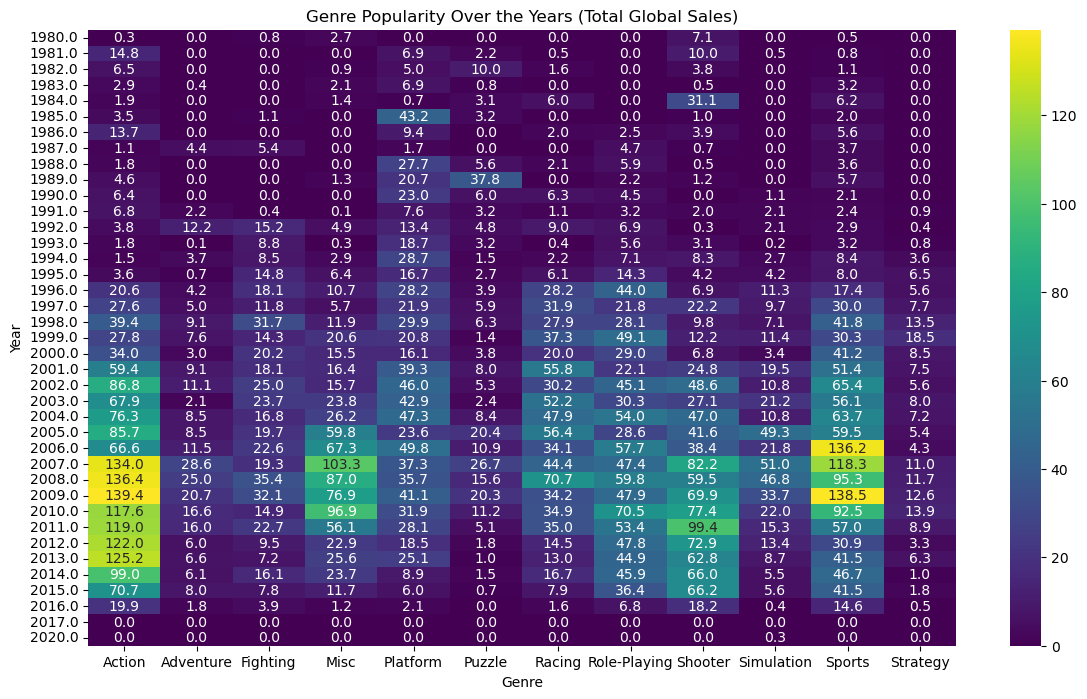

In [67]:
genre_year = df.pivot_table(index='Year', columns='Genre', values='Global_Sales', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(genre_year, cmap='viridis', annot=True, fmt=".1f")
plt.title('Genre Popularity Over the Years (Total Global Sales)')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()

In [53]:
df['Year'] = df['Year'].dt.year

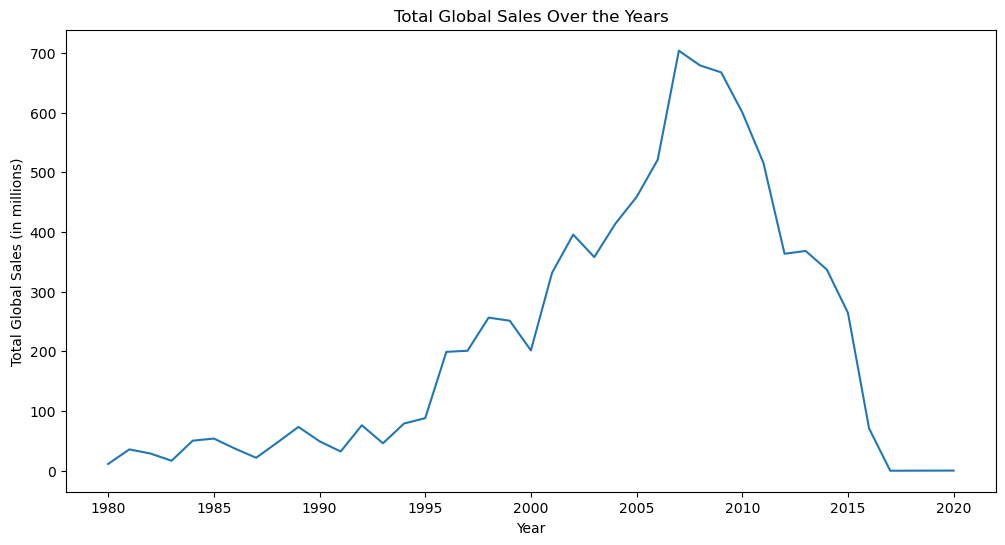

In [55]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Total Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.show()

Modeling

In [24]:
df = pd.get_dummies(df, columns=['Genre', 'Platform', 'Publisher'], drop_first=True)

In [25]:
X = df.drop(columns=['Rank', 'Name', 'Year', 'Global_Sales'])
y = df['Global_Sales']

In [26]:
scaler = StandardScaler()
X[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = scaler.fit_transform(X[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred = model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.7680955021693973
R^2 Score: 0.8178628062363142


In [34]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)

In [59]:
comparison_df_sample = comparison_df.head(20) 

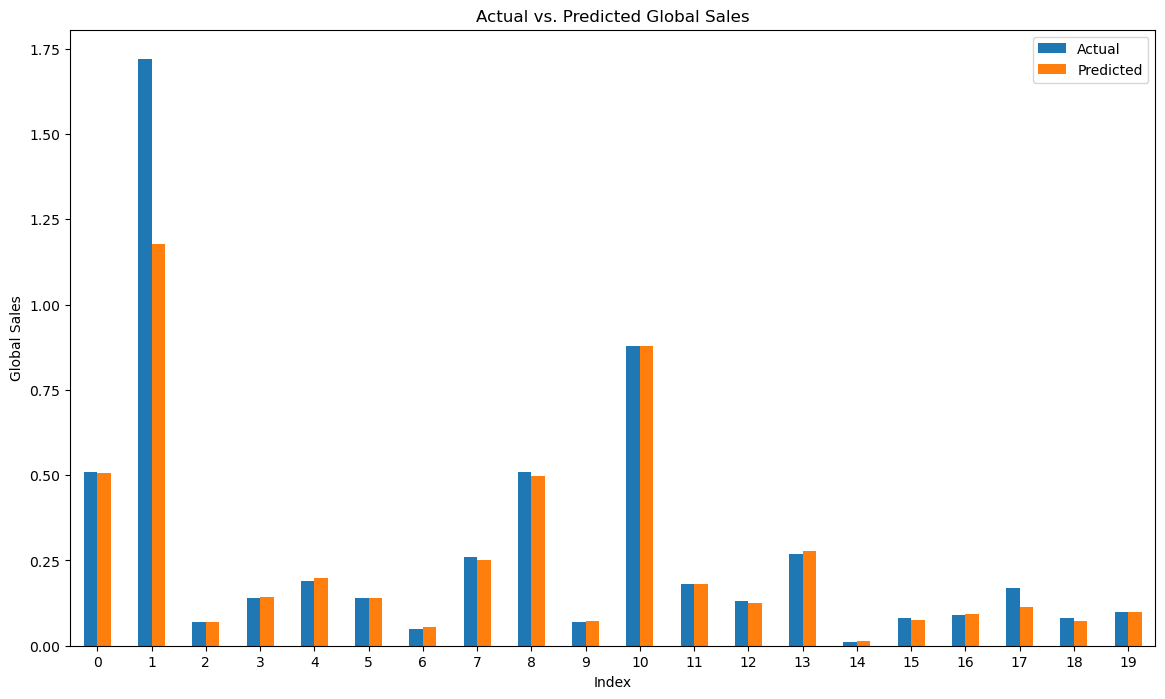

In [60]:
comparison_df_sample.plot(kind='bar', figsize=(14, 8))
plt.title('Actual vs. Predicted Global Sales')
plt.xlabel('Index')
plt.ylabel('Global Sales')
plt.xticks(rotation=0)
plt.show()

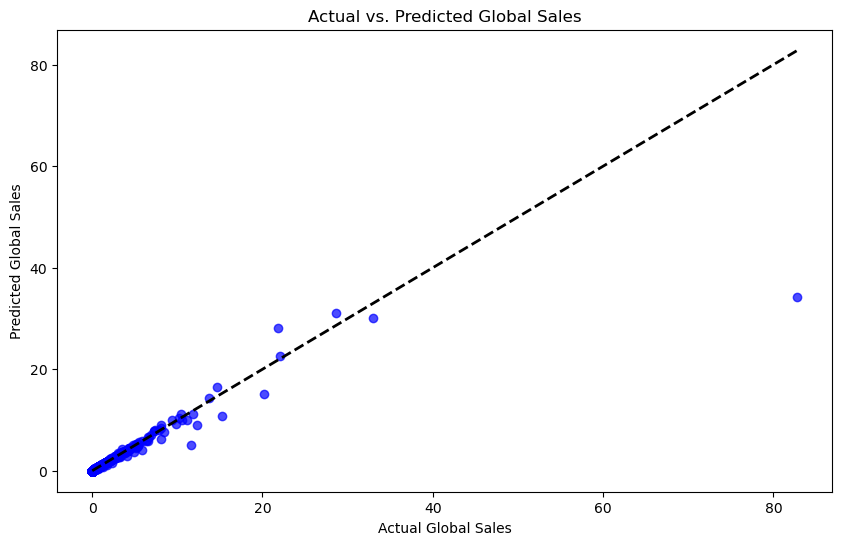

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs. Predicted Global Sales')
plt.show()